# Overfitting and Early Stopping

### Importing the libraries

In [1]:

import matplotlib.pyplot as plt
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator, load_img



## Data Preprocessing

In [2]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)
training_set = train_datagen.flow_from_directory('fruit_dataset/train',
                                                 target_size = (200, 200),
                                                 batch_size = 8,
                                                 class_mode = 'categorical')

Found 240 images belonging to 4 classes.


In [3]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('fruit_dataset/test',
                                            target_size = (200, 200),
                                            batch_size = 8,
                                            class_mode = 'categorical')

Found 60 images belonging to 4 classes.


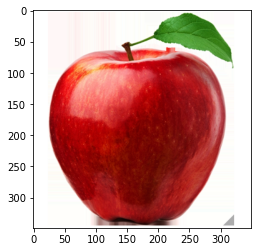

In [4]:
# Visualizing Training data
plt.imshow(load_img('fruit_dataset/train/apple/apple_1.jpg'))

## Building the CNN

### Dropout
Another technique to reduce overfitting is to introduce dropout regularization to the network.

When you apply dropout to a layer, it randomly drops out (by setting the activation to zero) a number of output units from the layer during the training process. Dropout takes a fractional number as its input value, in the form such as 0.1, 0.2, 0.4, etc. This means dropping out 10%, 20% or 40% of the output units randomly from the applied layer.

Let's create a new neural network with tf.keras.layers.Dropout before training it using the augmented images:

In [5]:
# Creating a Sequential model
# ** We can try to use 'tanh' activation in all the conv2D layers **
model= Sequential()
model.add(Conv2D(kernel_size=(3,3), filters=32, activation='relu', input_shape=(200,200,3,)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='relu'))
model.add(Dropout(0.2)),
model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(4,activation = 'softmax'))
    
model.compile(
              loss='categorical_crossentropy', 
              metrics=['acc'],
              optimizer='adam'
             )

In [6]:
# Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 30)        8670      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 30)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 30)        8130      
_________________________________________________________________
dropout (Dropout)            (None, 46, 46, 30)        0         
_________________________________________________________________
flatten (Flatten)            (None, 63480)             0

### Training the CNN on the Training set and evaluating it on the Test set


In [7]:
from keras import callbacks
# This callback will stop the training when there is no improvement in
callback = callbacks.EarlyStopping(monitor='loss', patience=3)

# Training the model
history = model.fit(x = training_set, validation_data = test_set ,epochs=50, callbacks=[callback])

C:\Users\avivg\anaconda3\lib\site-packages\PIL\Image.py:962: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1/50
30/30 [==============================] - 16s 524ms/step - loss: 1.4679 - acc: 0.4625 - val_loss: 0.8836 - val_acc: 0.6333
Epoch 2/50
30/30 [==============================] - 15s 493ms/step - loss: 0.7655 - acc: 0.7000 - val_loss: 0.5192 - val_acc: 0.8833
Epoch 3/50
30/30 [==============================] - 16s 528ms/step - loss: 0.5369 - acc: 0.8167 - val_loss: 0.6305 - val_acc: 0.7667
Epoch 4/50
30/30 [==============================] - 13s 446ms/step - loss: 0.3274 - acc: 0.8750 - val_loss: 0.3184 - val_acc: 0.9333
Epoch 5/50
30/30 [==============================] - 13s 425ms/step - loss: 0.2865 - acc: 0.8917 - val_loss: 0.3341 - val_acc: 0.9000
Epoch 6/50
30/30 [==============================] - 13s 424ms/step - loss: 0.3259 - acc: 0.8958 - val_loss: 0.4240 - val_acc: 0.8833
Epoch 7/50
30/30 [==============================] - 15s 494ms/step - loss: 0.2594 - acc: 0.9125 - val_loss: 0.2838 - val_acc: 0.8833
Epoch 8/50
30/30 [==============================] - 15s 488ms/step - 

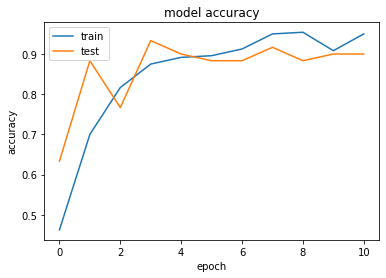

In [8]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

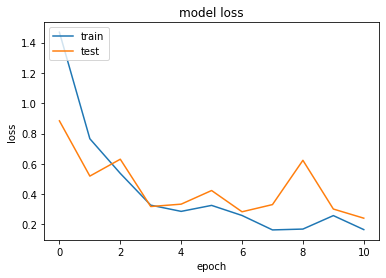

In [9]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [10]:
print(history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


In [11]:
accuracy = round(history.history['acc'][-1], 2)
print(f'The model accuracy is: {accuracy}')

The model accuracy is: 0.95


## Single Prediction


In [14]:
# fruit_classes = {0: 'banana', 1: 'apple', 2: 'mixed', 3: 'orange'}
in_classes = {y:x for x,y in training_set.class_indices.items()}
in_classes

{0: 'apple', 1: 'banana', 2: 'mixed', 3: 'orange'}

In [21]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('fruit_dataset/test/orange/orange_77.jpg', target_size = (200, 200))
test_image = image.img_to_array(test_image)
test_image = test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
result = np.argmax(result)
print(in_classes[result])


orange
